In [35]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## No NaN object!

In [6]:
dfc = df.copy()

In [7]:
dfc['smoker'] = dfc['smoker'].map(lambda x: '1' if x == 'yes' else '0')
dfc['sex'] = dfc['sex'].map(lambda x: '1' if x == 'male' else '0')

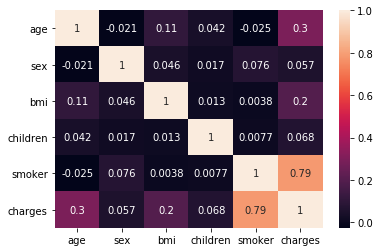

In [15]:
dfc['smoker'] = dfc['smoker'].astype(int)
dfc['sex'] = dfc['sex'].astype(int)
sns.heatmap(dfc.corr() , annot=True )

## So, age, bmi and smoker are key figures while the rest are not.

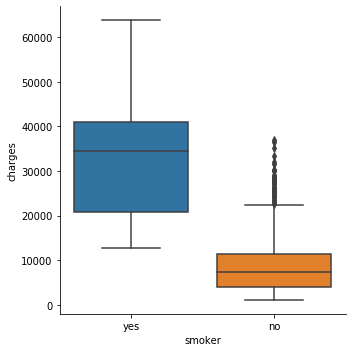

In [30]:
sns.catplot(x="smoker", y="charges", kind="box", data=df)

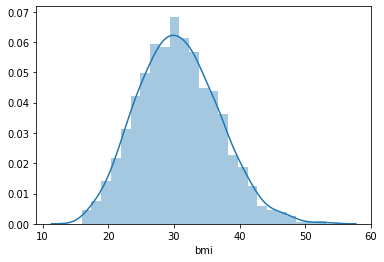

In [21]:
sns.distplot(dfc.bmi)

## I decided to add an obesity degree matching to the bmi, where -1 is underweight and 3 is 3 degree of obesity.

In [23]:
dfc['obesity_rate'] = ''

In [27]:
dfc['obesity_rate'].loc[(dfc['bmi'] <= 18.5 )] = '-1'
dfc['obesity_rate'].loc[(dfc['bmi'] > 18.5 ) & (dfc['bmi'] <= 30 )] ='0'
dfc['obesity_rate'].loc[(dfc['bmi'] > 30 ) & (dfc['bmi'] <= 35 )] = '1'
dfc['obesity_rate'].loc[(dfc['bmi'] > 35 ) & (dfc['bmi'] <= 40 ) ] = '2'
dfc['obesity_rate'].loc[(dfc['bmi'] > 40 )] = '3'

/home/illmup/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [50]:
dfc['obesity_rate'].head(20)

0     0
1     1
2     1
3     0
4     0
5     0
6     1
7     0
8     0
9     0
10    0
11    0
12    1
13    2
14    3
15    0
16    1
17    0
18    3
19    2
Name: obesity_rate, dtype: object

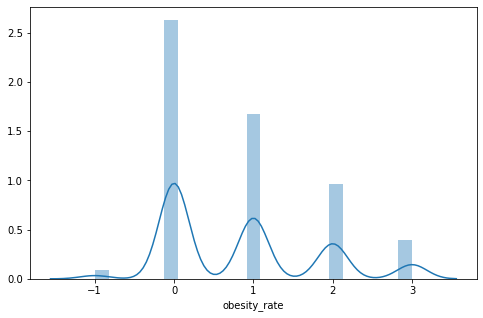

In [45]:
sns.distplot(dfc.obesity_rate)

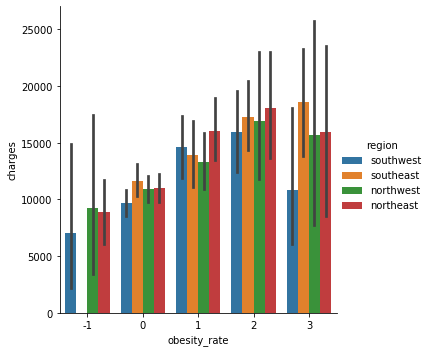

In [34]:
sns.catplot(x="obesity_rate", y="charges", hue="region", kind="bar", data=dfc)

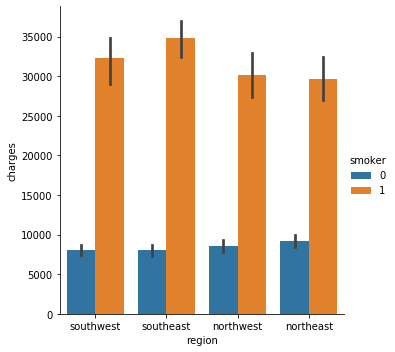

In [53]:
sns.catplot(x="region", y="charges", hue="smoker", kind="bar", data=dfc)

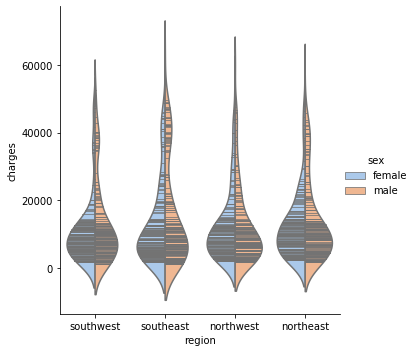

In [49]:
sns.catplot(x="region", y="charges", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=df);

### So, we can conclude that in southwest for the 3rd degree of obesity the insurance price is slightly lower than in other regions. Whereas no specific features were noticed when considering smoking and gender.

# Hypotheses

1. The price of health insurance is most affected by whether a person smokes. 
2. The gender and number of children have almost no impact on the cost of medical insurance.